How sleeping hours affect exam score?
average difference between previous and current exam score
is there any dependence between study hours and sleeping hours
does sleeping hours and attendence percent are connectedd?
most students sleeping period

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv("student_exam_scores.csv")

In [55]:
df

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [57]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [58]:
df["sleep_hours"].max()

9.0

In [59]:
df[df["sleep_hours"]==9.0][["attendance_percent","previous_scores","exam_score"]]

,attendance_percent,previous_scores,exam_score
15,51.2,41,34.1
54,62.4,70,34.4
55,81.9,57,37.0


In [60]:
df["attendance_percent"].max()

100.0

In [61]:
df["attendance_percent"].min()

50.3

In [62]:
df[df["attendance_percent"]==100][["sleep_hours","previous_scores","exam_score"]]

,sleep_hours,previous_scores,exam_score
120,8.3,78,47.9


In [63]:
df[df["attendance_percent"]==50.3][["sleep_hours","previous_scores","exam_score"]]

,sleep_hours,previous_scores,exam_score
27,8.3,75,26.5
81,5.0,80,32.4


In [64]:
df[df["attendance_percent"]==50.3][["sleep_hours","previous_scores","exam_score","hours_studied"]]

,sleep_hours,previous_scores,exam_score,hours_studied
27,8.3,75,26.5,2.1
81,5.0,80,32.4,3.9


In [65]:
df[df["attendance_percent"]==100][["sleep_hours","previous_scores","exam_score","hours_studied"]]

,sleep_hours,previous_scores,exam_score,hours_studied
120,8.3,78,47.9,9.4


In [66]:
df.sort_values(by=["exam_score","hours_studied"],ascending=[True,False])

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
19,S020,1.1,5.5,53.6,65,17.1
7,S008,2.0,4.3,75.8,55,18.3
142,S143,3.9,4.1,55.4,53,19.0
183,S184,2.1,6.0,54.3,54,19.4
70,S071,3.3,8.1,70.4,40,20.8
...,...,...,...,...,...,...
71,S072,11.4,5.5,77.1,85,47.9
120,S121,9.4,8.3,100.0,78,47.9
60,S061,11.9,8.4,53.9,78,48.6
83,S084,10.9,5.3,87.7,88,48.9


In [70]:
df.head(5)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


<BarContainer object of 200 artists>

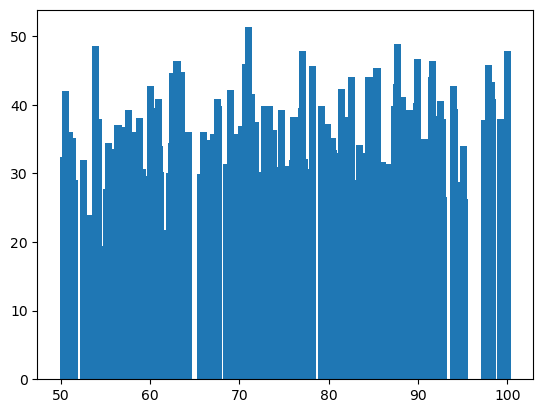

In [71]:
plt.bar(df["attendance_percent"],df["exam_score"])

<BarContainer object of 200 artists>

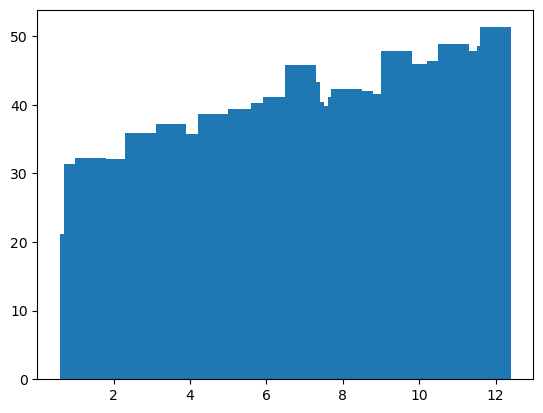

In [72]:
plt.bar(df["hours_studied"],df["exam_score"])

In [73]:
import seaborn as sns

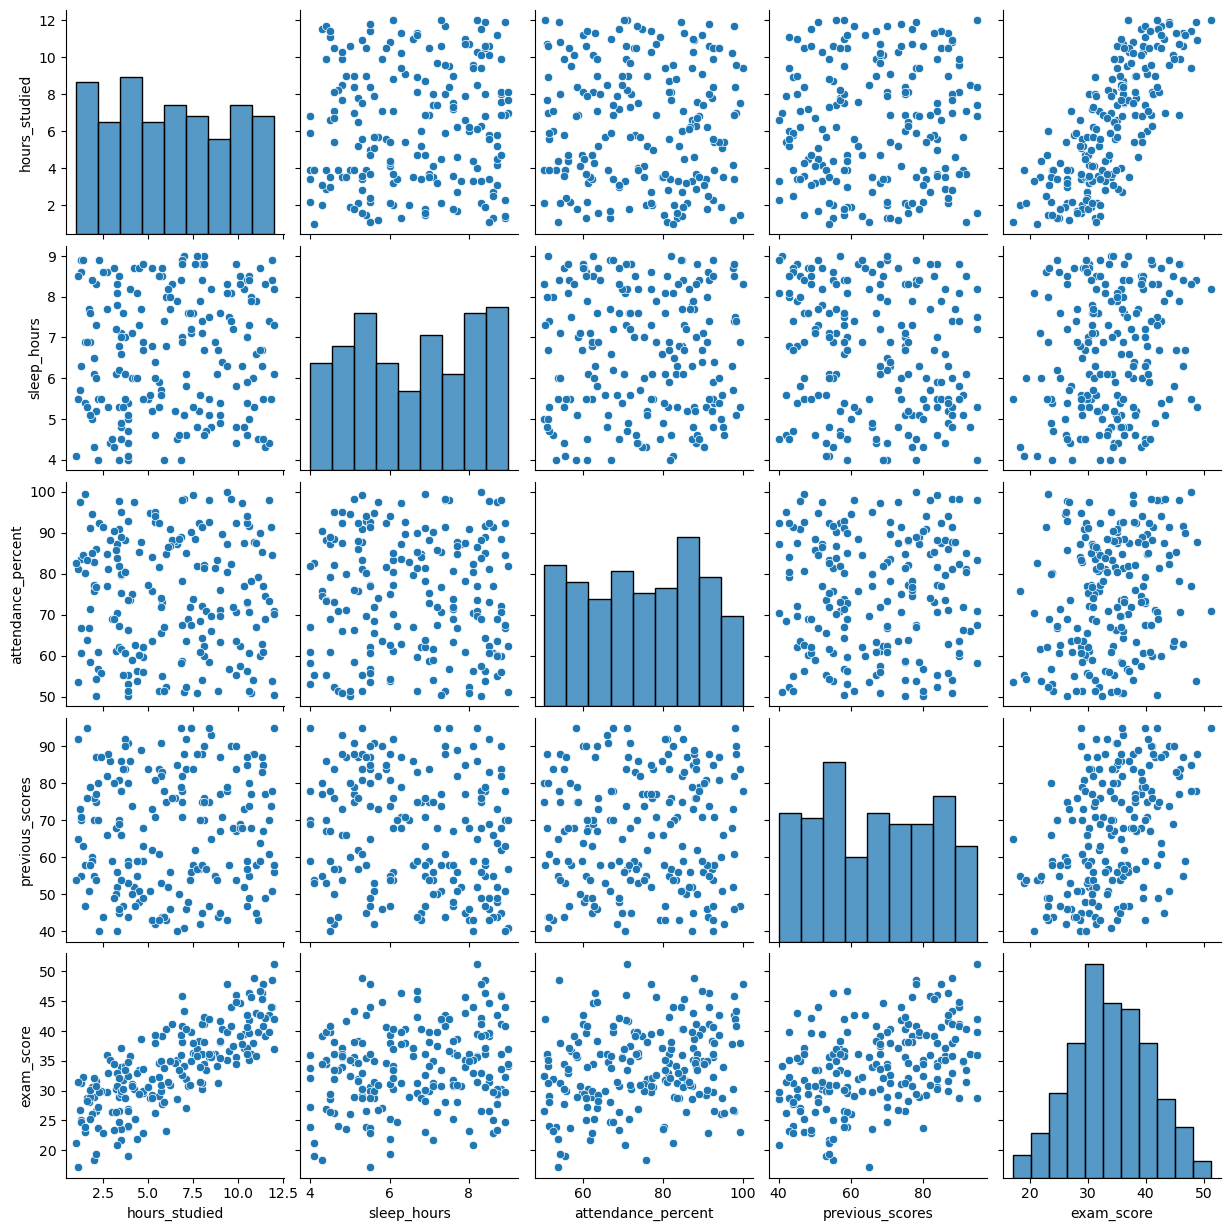

In [75]:
sns.pairplot(df)

In [77]:
df.corr(numeric_only=True)

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
hours_studied,1.000000,0.077864,-0.031311,0.069078,0.776751
sleep_hours,0.077864,1.000000,0.000572,-0.194251,0.188222
attendance_percent,-0.031311,0.000572,1.000000,0.051958,0.225713
previous_scores,0.069078,-0.194251,0.051958,1.000000,0.431105
exam_score,0.776751,0.188222,0.225713,0.431105,1.000000


In [78]:
h=df[["attendance_percent","exam_score"]].corr()

<Axes: >

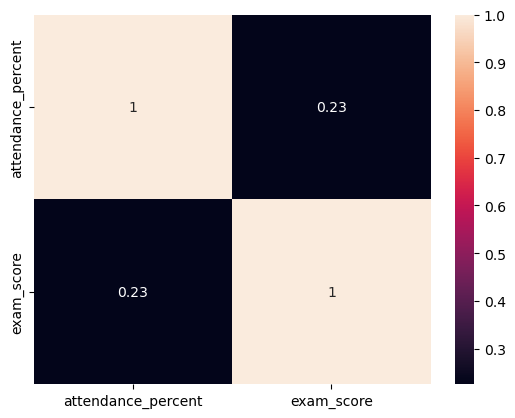

In [79]:
sns.heatmap(h,annot=True)

In [80]:
h=df[["hours_studied","exam_score"]].corr()

<Axes: >

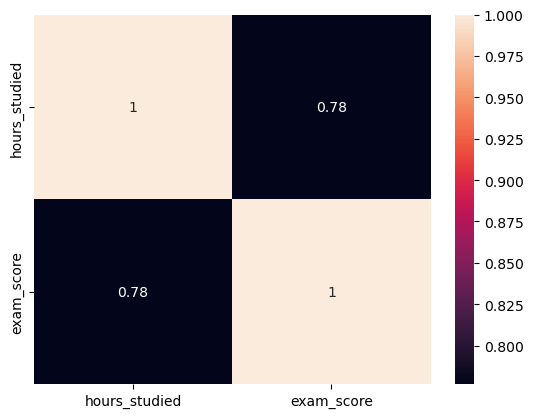

In [81]:
sns.heatmap(h,annot=True)

<Axes: xlabel='exam_score', ylabel='Count'>

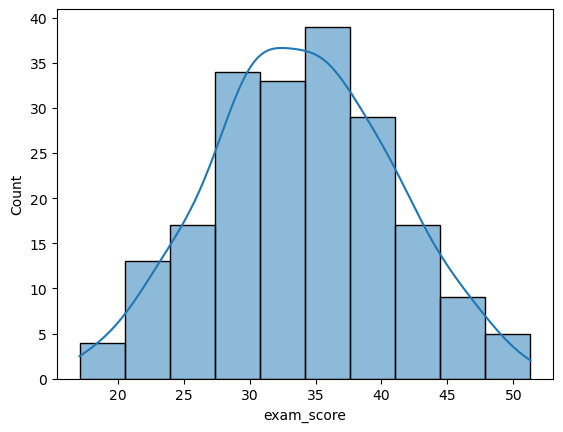

In [84]:
sns.histplot(df["exam_score"],bins=10,kde=True)

In [86]:
df["sleep_hours"].max()

9.0

In [89]:
s=df.sort_values(["exam_score","sleep_hours"],ascending=[True,False])

In [90]:
s

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
19,S020,1.1,5.5,53.6,65,17.1
7,S008,2.0,4.3,75.8,55,18.3
142,S143,3.9,4.1,55.4,53,19.0
183,S184,2.1,6.0,54.3,54,19.4
70,S071,3.3,8.1,70.4,40,20.8
...,...,...,...,...,...,...
120,S121,9.4,8.3,100.0,78,47.9
71,S072,11.4,5.5,77.1,85,47.9
60,S061,11.9,8.4,53.9,78,48.6
83,S084,10.9,5.3,87.7,88,48.9


In [92]:
f=s.head(10)

In [93]:
f

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
19,S020,1.1,5.5,53.6,65,17.1
7,S008,2.0,4.3,75.8,55,18.3
142,S143,3.9,4.1,55.4,53,19.0
183,S184,2.1,6.0,54.3,54,19.4
70,S071,3.3,8.1,70.4,40,20.8
124,S125,1.0,4.1,82.6,54,21.2
66,S067,3.5,7.1,61.6,54,21.7
149,S150,4.4,6.0,53.8,55,21.9
169,S170,2.5,8.6,91.4,44,22.8
185,S186,4.7,5.5,62.2,49,22.9


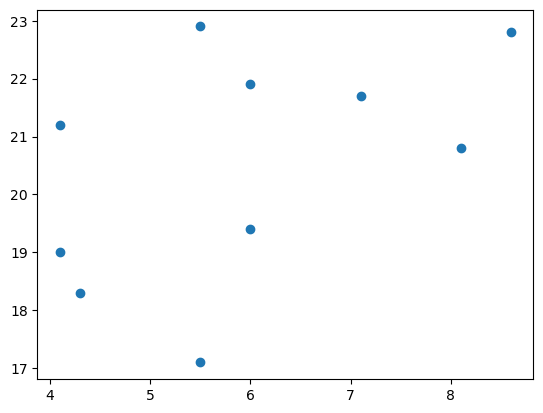

In [109]:
plt.scatter(f["sleep_hours"],f["exam_score"])

In [149]:
df["sleep_hours"].corr(df["exam_score"])

np.float64(0.18822198470447812)

<BarContainer object of 10 artists>

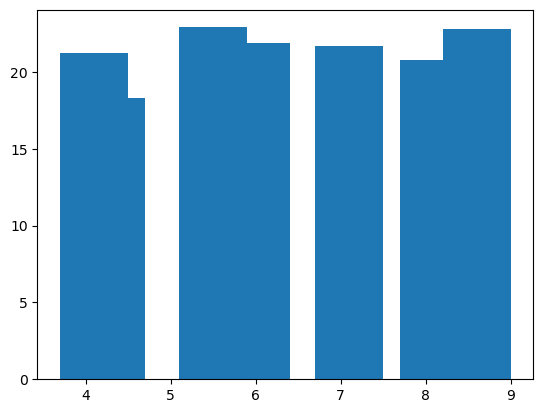

In [96]:
plt.bar(f["sleep_hours"],f["exam_score"])

In [97]:
df["previous_scores"].max()

95

In [98]:
df["previous_scores"].min()

40

In [99]:
s=df.sort_values(["previous_scores","exam_score"],ascending=[True,False])

In [100]:
s

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
154,S155,2.3,8.9,92.5,40,29.7
87,S088,6.6,4.5,87.4,40,28.6
70,S071,3.3,8.1,70.4,40,20.8
15,S016,7.0,9.0,51.2,41,34.1
161,S162,7.9,5.6,68.5,42,31.4
...,...,...,...,...,...,...
86,S087,12.0,8.2,71.0,95,51.3
167,S168,8.4,7.5,98.0,95,42.0
82,S083,7.4,7.2,67.6,95,39.8
97,S098,6.8,4.0,58.3,95,36.0


In [101]:
g=s.head(10)

In [102]:
g

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
154,S155,2.3,8.9,92.5,40,29.7
87,S088,6.6,4.5,87.4,40,28.6
70,S071,3.3,8.1,70.4,40,20.8
15,S016,7.0,9.0,51.2,41,34.1
161,S162,7.9,5.6,68.5,42,31.4
75,S076,5.4,4.6,95.2,42,26.3
76,S077,11.1,4.5,79.2,43,39.9
137,S138,9.4,8.1,80.4,43,35.1
190,S191,5.6,8.5,92.5,43,32.2
95,S096,5.2,6.8,84.0,43,28.7


<BarContainer object of 10 artists>

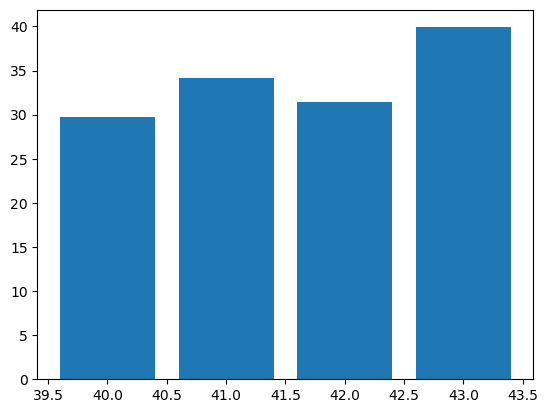

In [105]:
plt.bar(g["previous_scores"],g["exam_score"])

<Axes: xlabel='previous_scores', ylabel='exam_score'>

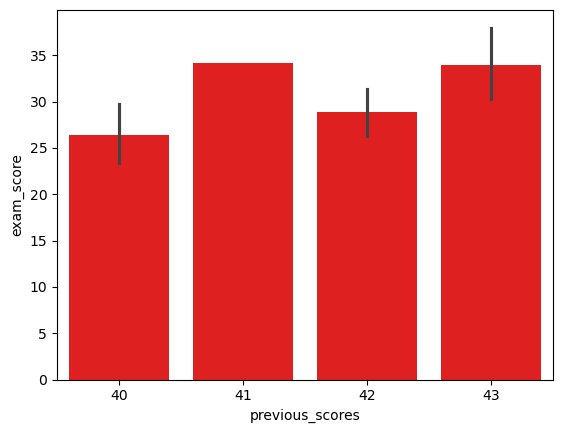

In [107]:
sns.barplot(x="previous_scores",y="exam_score",data=g,color="red",estimator="mean")

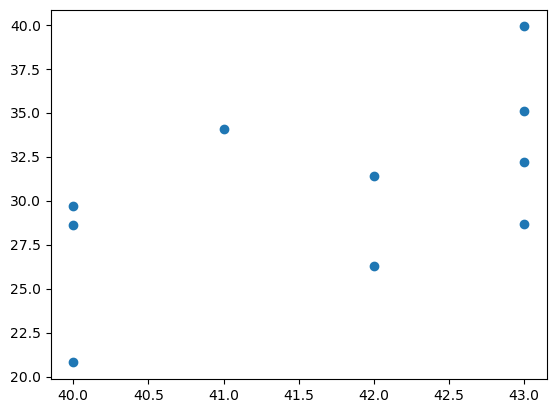

In [108]:
plt.scatter(g["previous_scores"],g["exam_score"])

In [111]:
corr=df["hours_studied"].corr(df["sleep_hours"])

In [112]:
corr

np.float64(0.07786430142964211)

In [113]:
print(corr)

0.07786430142964211


In [116]:
df.corr(numeric_only=True)

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
hours_studied,1.000000,0.077864,-0.031311,0.069078,0.776751
sleep_hours,0.077864,1.000000,0.000572,-0.194251,0.188222
attendance_percent,-0.031311,0.000572,1.000000,0.051958,0.225713
previous_scores,0.069078,-0.194251,0.051958,1.000000,0.431105
exam_score,0.776751,0.188222,0.225713,0.431105,1.000000


In [117]:
h=df[["hours_studied","sleep_hours"]].corr()

In [118]:
h

,hours_studied,sleep_hours
hours_studied,1.000000,0.077864
sleep_hours,0.077864,1.000000


<Axes: >

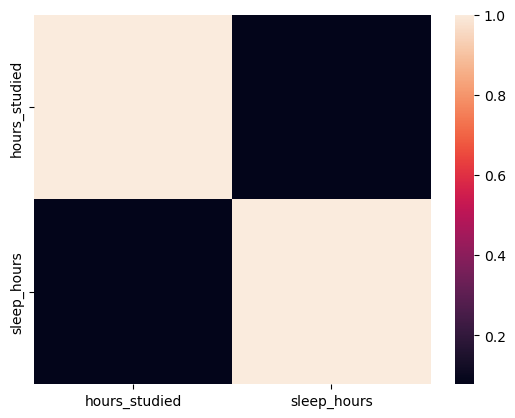

In [119]:
sns.heatmap(h)

In [120]:
df.attendance_percent

0      72.1
1      60.7
2      73.7
3      95.1
4      89.8
       ... 
195    94.0
196    85.1
197    63.8
198    50.5
199    97.4
Name: attendance_percent, Length: 200, dtype: float64

In [121]:
df.sleep_hours

0      8.8
1      8.6
2      8.2
3      4.8
4      6.4
      ... 
195    5.4
196    6.1
197    6.9
198    7.3
199    6.3
Name: sleep_hours, Length: 200, dtype: float64

In [122]:
s=df.sort_values(["attendance_percent","sleep_hours"],ascending=[True,False])

In [123]:
s

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
27,S028,2.1,8.3,50.3,75,26.5
81,S082,3.9,5.0,50.3,80,32.4
198,S199,12.0,7.3,50.5,58,42.0
128,S129,10.7,8.0,51.0,68,36.1
118,S119,7.7,4.8,51.0,88,35.8
...,...,...,...,...,...,...
141,S142,7.0,5.1,98.2,88,43.3
173,S174,9.6,7.4,98.3,90,40.9
157,S158,7.5,5.3,99.2,84,37.9
41,S042,1.5,6.9,99.4,47,23.1


In [124]:
m=s.head(10)

In [125]:
m

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
27,S028,2.1,8.3,50.3,75,26.5
81,S082,3.9,5.0,50.3,80,32.4
198,S199,12.0,7.3,50.5,58,42.0
128,S129,10.7,8.0,51.0,68,36.1
118,S119,7.7,4.8,51.0,88,35.8
15,S016,7.0,9.0,51.2,41,34.1
101,S102,8.9,6.7,51.3,44,31.3
143,S144,10.6,5.0,51.3,80,35.1
189,S190,5.9,7.4,51.4,44,28.0
104,S105,3.9,4.7,51.4,44,24.1


In [126]:
corr=df["attendance_percent"].corr(df["sleep_hours"])

In [127]:
corr

np.float64(0.000571902120451145)

In [136]:
print(df["sleep_hours"].value_counts())

sleep_hours
5.5    9
5.3    7
6.1    6
8.8    6
6.0    6
7.6    6
8.5    6
8.7    6
8.3    6
6.9    6
8.4    6
4.6    5
6.7    5
4.0    5
8.9    5
8.2    5
5.1    5
4.8    5
4.5    5
5.6    4
5.4    4
5.2    4
7.3    4
7.1    4
6.3    4
7.9    4
8.1    4
7.4    4
4.4    4
7.7    4
7.0    4
8.6    3
4.3    3
6.8    3
8.0    3
7.2    3
9.0    3
5.0    3
6.4    2
5.9    2
4.9    2
6.6    2
5.7    2
4.7    2
5.8    2
7.5    2
4.1    2
6.5    1
7.8    1
6.2    1
Name: count, dtype: int64


In [145]:
print(df["exam_score"].value_counts())

exam_score
36.1    5
31.0    3
35.8    3
30.7    3
28.8    3
       ..
46.7    1
33.8    1
40.4    1
28.2    1
37.8    1
Name: count, Length: 139, dtype: int64


In [146]:
print(df["previous_scores"].value_counts())

previous_scores
58    9
84    7
70    7
54    7
59    7
75    6
68    6
88    6
55    5
90    5
43    5
78    5
47    5
87    5
76    5
95    5
44    5
57    4
77    4
45    4
71    4
52    4
56    4
51    4
80    4
49    4
50    3
85    3
73    3
86    3
66    3
79    3
40    3
92    3
82    3
53    3
46    3
67    3
74    3
63    2
81    2
65    2
91    2
62    2
61    2
69    2
48    2
83    2
42    2
41    1
93    1
60    1
89    1
64    1
Name: count, dtype: int64


In [147]:
print(df["exam_score"].value_counts())

exam_score
36.1    5
31.0    3
35.8    3
30.7    3
28.8    3
       ..
46.7    1
33.8    1
40.4    1
28.2    1
37.8    1
Name: count, Length: 139, dtype: int64
